# Trabalho Final - MLOPs

Integrantes:

    1) Emerson Faria de Oliveira
    2) Tiago Muniz de Oliveira
    3) Caio Lima Uno
    4) Vinicius Vendrami Scocca

## Import das libs

In [1]:
import pandas as pd
import numpy as np

In [2]:
# leitura dos dados
loan = pd.read_csv('./loan_default.csv')
loan.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co_applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
1,24932,2019,cf,Male,nopre,type3,p4,l1,nopc,nob/c,...,EQUI,765,EXP,45-54,to_inst,NaN,North,direct,1,NaN
2,25039,2019,cf,Male,nopre,type2,p3,l1,nopc,b/c,...,EQUI,880,EXP,35-44,to_inst,NaN,North,direct,1,NaN
3,25101,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EQUI,880,EXP,45-54,to_inst,NaN,central,direct,1,NaN
4,25110,2019,cf,Male,nopre,type3,p3,l1,nopc,nob/c,...,EQUI,768,EXP,45-54,not_inst,NaN,North,direct,1,NaN


### Analise Geral do dataset

In [3]:
print(loan.info())
print(loan.isnull().sum())
loan['Status'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

Status
0    112031
1     36639
Name: count, dtype: int64

In [4]:
loan = loan.drop([
                  'ID',
                  'Gender',
                  'rate_of_interest',
                  'Interest_rate_spread',
                  'Upfront_charges',
                  # 'loan_limit',
                  # 'approv_in_adv',
                  # 'loan_purpose',

                  # 'term',
                  # 'Neg_ammortization',
                  
                  # 'property_value',
                  # 'income',
                #   'age',
                  # 'submission_of_application',
                  # 'LTV',
                  # 'dtir1',
                  ], axis=1)

In [5]:
print(loan.info())
loan.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 29 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   year                       148670 non-null  int64  
 1   loan_limit                 145326 non-null  object 
 2   approv_in_adv              147762 non-null  object 
 3   loan_type                  148670 non-null  object 
 4   loan_purpose               148536 non-null  object 
 5   Credit_Worthiness          148670 non-null  object 
 6   open_credit                148670 non-null  object 
 7   business_or_commercial     148670 non-null  object 
 8   loan_amount                148670 non-null  int64  
 9   term                       148629 non-null  float64
 10  Neg_ammortization          148549 non-null  object 
 11  interest_only              148670 non-null  object 
 12  lump_sum_payment           148670 non-null  object 
 13  property_value             13

year                             0
loan_limit                    3344
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
term                            41
Neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
Secured_by                       0
total_units                      0
income                        9150
credit_type                      0
Credit_Score                     0
co_applicant_credit_type         0
age                            200
submission_of_application      200
LTV                          15098
Region                           0
Security_Type                    0
Status                           0
dtir1               

In [6]:
loan['Status'].value_counts()

Status
0    112031
1     36639
Name: count, dtype: int64

In [7]:
# loan['property_value'].fillna(loan['property_value'].median(), inplace=True)
loan.fillna({'property_value':loan['property_value'].median()}, inplace=True)
loan.fillna({'income':loan['income'].median()}, inplace=True)
loan.fillna({'term':loan['term'].median()}, inplace=True)

loan.fillna({'LTV':loan['LTV'].median()}, inplace=True)
loan = loan[loan['LTV']<=300]

loan.fillna({'dtir1':loan['dtir1'].median()}, inplace=True)

loan['loan_limit'] = loan['loan_limit'].fillna(loan['loan_limit'].mode()[0])
loan['approv_in_adv'] = loan['approv_in_adv'].fillna(loan['approv_in_adv'].mode()[0])
loan['loan_purpose'] = loan['loan_purpose'].fillna(loan['loan_purpose'].mode()[0])

loan['Neg_ammortization'] = loan['Neg_ammortization'].fillna(loan['Neg_ammortization'].mode()[0])
loan['age'] = loan['age'].fillna(loan['age'].mode()[0])
loan['submission_of_application'] = loan['submission_of_application'].fillna(loan['submission_of_application'].mode()[0])

loan.isnull().sum()

year                         0
loan_limit                   0
approv_in_adv                0
loan_type                    0
loan_purpose                 0
Credit_Worthiness            0
open_credit                  0
business_or_commercial       0
loan_amount                  0
term                         0
Neg_ammortization            0
interest_only                0
lump_sum_payment             0
property_value               0
construction_type            0
occupancy_type               0
Secured_by                   0
total_units                  0
income                       0
credit_type                  0
Credit_Score                 0
co_applicant_credit_type     0
age                          0
submission_of_application    0
LTV                          0
Region                       0
Security_Type                0
Status                       0
dtir1                        0
dtype: int64

In [8]:
loan.dtypes

year                           int64
loan_limit                    object
approv_in_adv                 object
loan_type                     object
loan_purpose                  object
Credit_Worthiness             object
open_credit                   object
business_or_commercial        object
loan_amount                    int64
term                         float64
Neg_ammortization             object
interest_only                 object
lump_sum_payment              object
property_value               float64
construction_type             object
occupancy_type                object
Secured_by                    object
total_units                   object
income                       float64
credit_type                   object
Credit_Score                   int64
co_applicant_credit_type      object
age                           object
submission_of_application     object
LTV                          float64
Region                        object
Security_Type                 object
S

In [9]:
print(loan['loan_type'].value_counts())
print()

print(loan['loan_limit'].value_counts())
print()
print(loan['approv_in_adv'].value_counts())
print()
print(loan['loan_purpose'].value_counts())
print()
print(loan['Neg_ammortization'].value_counts())
print()
print(loan['age'].value_counts())
print()
print(loan['submission_of_application'].value_counts())
print()

print(loan['Credit_Worthiness'].value_counts())
print()
print(loan['open_credit'].value_counts())
print()
print(loan['business_or_commercial'].value_counts())
print()
print(loan['interest_only'].value_counts())
print()
print(loan['lump_sum_payment'].value_counts())
print()
print(loan['construction_type'].value_counts())
print()
print(loan['occupancy_type'].value_counts())
print()
print(loan['Secured_by'].value_counts())
print()
print(loan['total_units'].value_counts())
print()
print(loan['credit_type'].value_counts())
print()
print(loan['co_applicant_credit_type'].value_counts())
print()
print(loan['Region'].value_counts())
print()
print(loan['Security_Type'].value_counts())
print()


loan_type
type1    113173
type2     20756
type3     14735
Name: count, dtype: int64

loan_limit
cf     138687
ncf      9977
Name: count, dtype: int64

approv_in_adv
nopre    125524
pre       23140
Name: count, dtype: int64

loan_purpose
p3    56068
p4    54793
p1    34529
p2     3274
Name: count, dtype: int64

Neg_ammortization
not_neg    133535
neg_amm     15129
Name: count, dtype: int64

age
45-54    34916
35-44    32817
55-64    32534
65-74    20743
25-34    19142
>74       7175
<25       1337
Name: count, dtype: int64

submission_of_application
to_inst     96013
not_inst    52651
Name: count, dtype: int64

Credit_Worthiness
l1    142339
l2      6325
Name: count, dtype: int64

open_credit
nopc    148108
opc        556
Name: count, dtype: int64

business_or_commercial
nob/c    127908
b/c       20756
Name: count, dtype: int64

interest_only
not_int     141554
int_only      7110
Name: count, dtype: int64

lump_sum_payment
not_lpsm    145280
lpsm          3384
Name: count, dtype: int64


## Visualização das distribuições dos dados

In [10]:
loan.drop(['year'], axis=1, inplace=True)

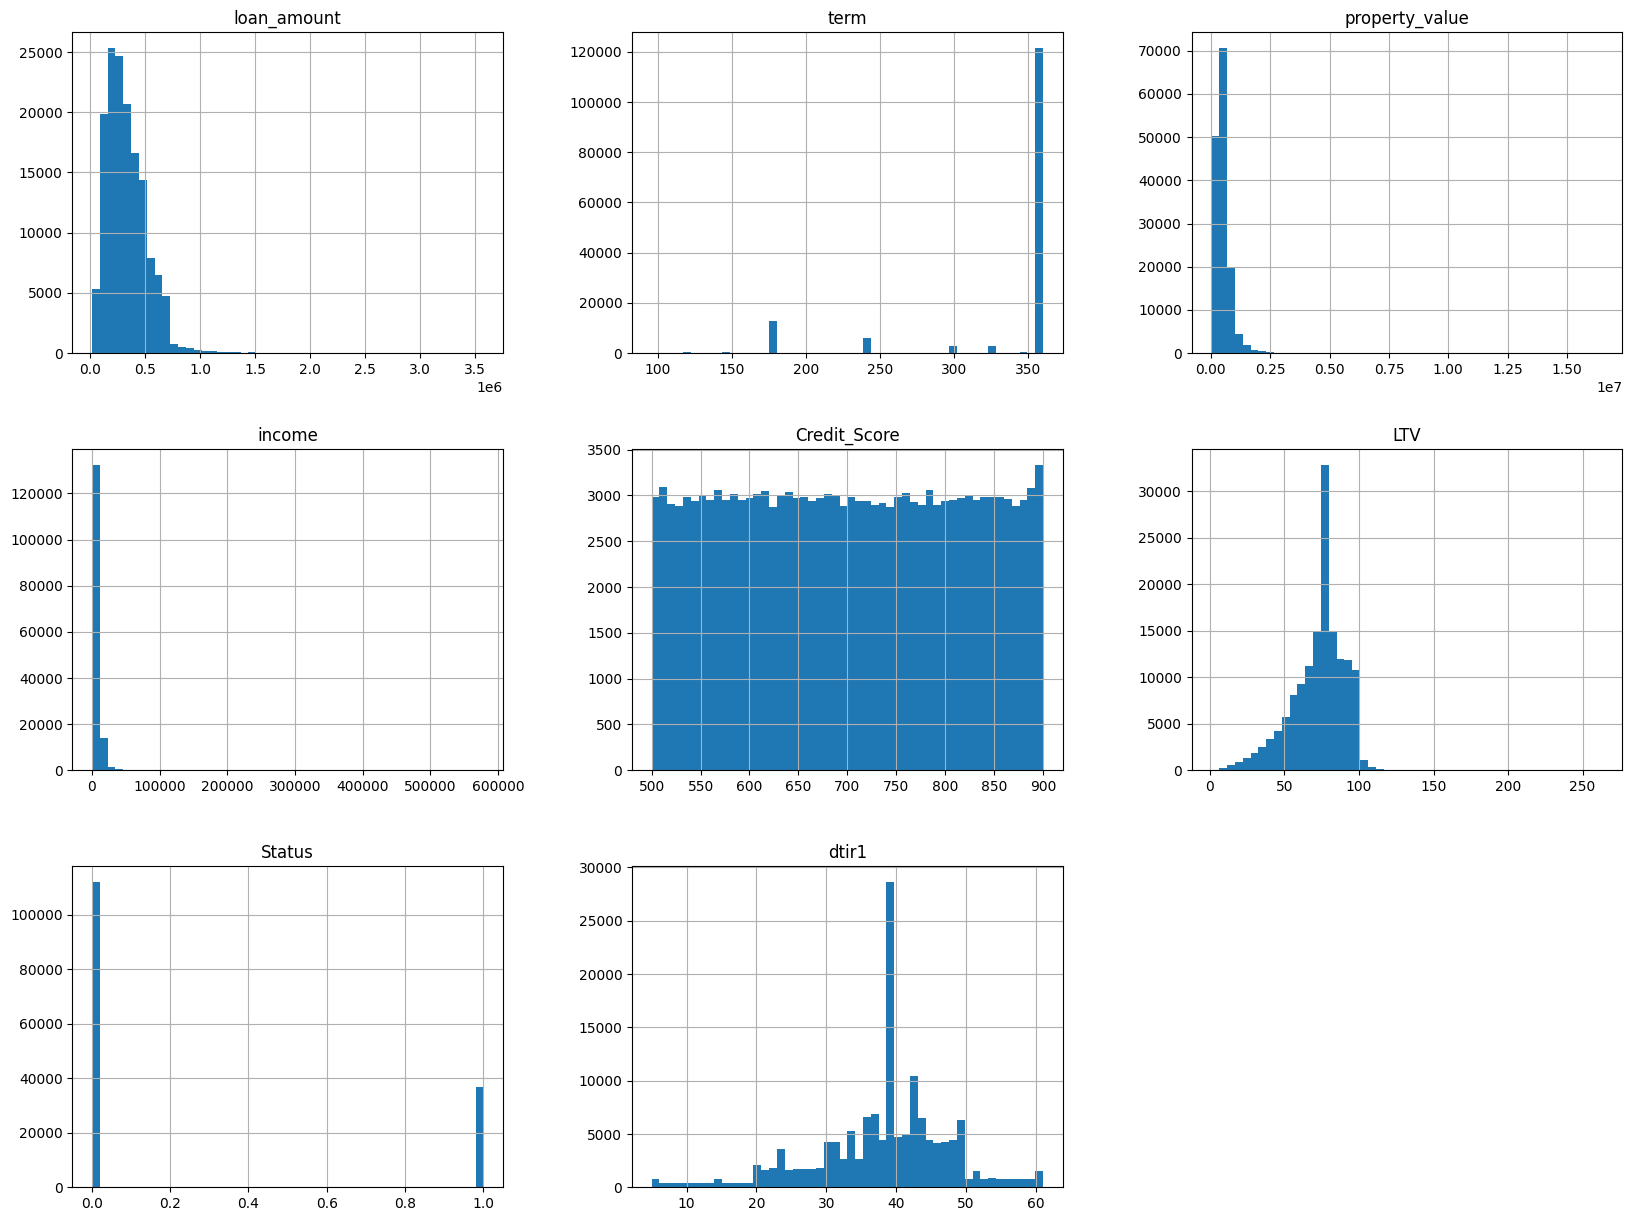

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogramas
loan.hist(bins=50, figsize=(20, 15))
plt.show()

### Matrix de correlação para checar correlação linear entre as features

In [12]:
loan_numerical = loan.copy()

                  # 'loan_limit',
                  # 'approv_in_adv',
                  # 'loan_purpose',
loan_numerical.drop(['loan_type','Neg_ammortization','loan_limit','approv_in_adv','age','submission_of_application','loan_purpose','Credit_Worthiness','open_credit','business_or_commercial','interest_only','lump_sum_payment','construction_type','occupancy_type','Secured_by','total_units','credit_type','co_applicant_credit_type','Region','Security_Type'], axis=1, inplace=True)

corr = loan_numerical.corr()
corr

,loan_amount,term,property_value,income,Credit_Score,LTV,Status,dtir1
loan_amount,1.000000,0.174343,0.686301,0.440725,0.004472,0.069126,-0.036810,0.014934
term,0.174343,1.000000,0.043076,-0.057388,-0.003160,0.208442,-0.000204,0.106336
property_value,0.686301,0.043076,1.000000,0.389441,0.002142,-0.439699,-0.080920,-0.059462
income,0.440725,-0.057388,0.389441,1.000000,0.000899,-0.070395,-0.060620,-0.254863
Credit_Score,0.004472,-0.003160,0.002142,0.000899,1.000000,-0.003073,0.003991,-0.000293
LTV,0.069126,0.208442,-0.439699,-0.070395,-0.003073,1.000000,0.093702,0.158371
Status,-0.036810,-0.000204,-0.080920,-0.060620,0.003991,0.093702,1.000000,0.082435
dtir1,0.014934,0.106336,-0.059462,-0.254863,-0.000293,0.158371,0.082435,1.000000


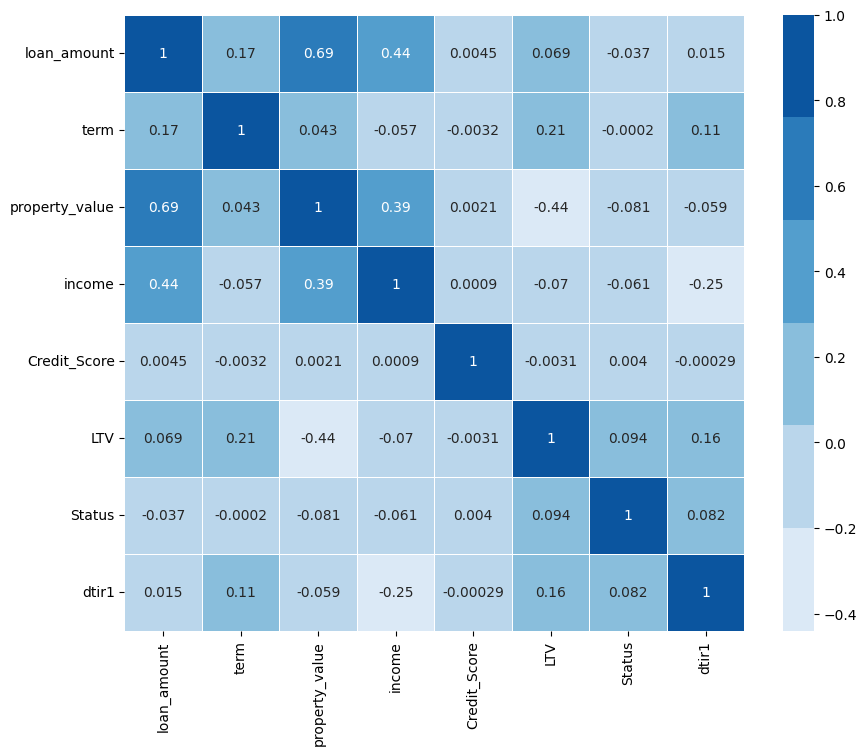

In [13]:
#Vamos ver a correlação graficamente
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, cmap=sns.color_palette("Blues"), linewidths=.5, annot=True);


## Preparação do dataset para o treinamento do modelo
* 80% treino
* 20% validação

### Aplicando tecnicas de undersampling na classe majoritaria

In [14]:
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler

X = loan.drop("Status", axis=1)
y = loan["Status"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Or undersampling the majority class
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X_train, y_train)


In [15]:
y_res.value_counts()

Status
0    29260
1    29260
Name: count, dtype: int64

### Criação do pipeline de pre-processamento dos dados

* Variaveis Numéricas: StandardScaler
* Variaveis Categoricas: OneHotEncoder

In [16]:
X.dtypes

loan_limit                    object
approv_in_adv                 object
loan_type                     object
loan_purpose                  object
Credit_Worthiness             object
open_credit                   object
business_or_commercial        object
loan_amount                    int64
term                         float64
Neg_ammortization             object
interest_only                 object
lump_sum_payment              object
property_value               float64
construction_type             object
occupancy_type                object
Secured_by                    object
total_units                   object
income                       float64
credit_type                   object
Credit_Score                   int64
co_applicant_credit_type      object
age                           object
submission_of_application     object
LTV                          float64
Region                        object
Security_Type                 object
dtir1                        float64
d

In [17]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler, OrdinalEncoder, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

num_attribs = ['loan_amount','property_value','income','Credit_Score','term','LTV','dtir1']
cat_attribs = ['loan_type','loan_limit','approv_in_adv','loan_purpose','Neg_ammortization','age','submission_of_application','Credit_Worthiness','open_credit','business_or_commercial','interest_only','lump_sum_payment','occupancy_type','total_units','credit_type','co_applicant_credit_type','Region']

num_pipeline = Pipeline([
    ('std_scaler', RobustScaler()),
    # ('std_scaler', MinMaxScaler()),
])

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
    # ("cat", OrdinalEncoder(), cat_attribs),
])

X_train_prepared = full_pipeline.fit_transform(X_res)
X_test_prepared = full_pipeline.transform(X_test)


## Parametros a serem otimizados pelo grid-search:
1. **n_estimators**: Este parâmetro é equivalente em todos os três modelos. Ele especifica o número de árvores de decisão na floresta ou conjunto. Em todos os casos, um número maior de árvores pode melhorar a precisão do modelo, mas também aumenta o tempo de computação e o risco de overfitting.

2. **max_depth (Random Forest e XGBoost) / num_leaves (LightGBM)**: Estes parâmetros controlam a complexidade das árvores individuais, mas são definidos de maneira diferente.
    * Random Forest e XGBoost (max_depth): Representa a profundidade máxima de cada árvore. Uma árvore mais profunda pode capturar mais variações dos dados, mas também pode levar a um overfitting.
    * LightGBM (num_leaves): Representa o número máximo de folhas (ou nós terminais) que uma árvore pode ter. Uma árvore com mais folhas será mais complexa. num_leaves é um conceito diferente de max_depth, mas ambos servem para controlar a complexidade da árvore.  
<br>
3. **learning_rate (XGBoost e LightGBM)**: Este parâmetro é específico para modelos de boosting, como XGBoost e LightGBM, e não se aplica ao Random Forest. Ele controla a taxa na qual o modelo aprende. Valores menores de learning_rate requerem mais árvores (maior n_estimators) para manter a mesma precisão, mas podem resultar em um modelo mais generalizado.

In [18]:
# Importando o Make Scorer
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
import numpy as np

# Importando os módulos de cálculo de métricas
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import fbeta_score

# Criando um dicionário com as métricas que desejo calcular.
meus_scores = {'accuracy' :make_scorer(accuracy_score),
               'recall'   :make_scorer(recall_score),
               'precision':make_scorer(precision_score),
               'f1'       :make_scorer(fbeta_score, beta = 1)}


# Definição dos espaços de parâmetros
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30]
}

param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [10, 20, 30]
}

param_grid_lgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'num_leaves': [31, 62, 127],
}

# Configuração do GridSearchCV para cada modelo
grid_rf = GridSearchCV(estimator=RandomForestClassifier(), 
                        param_grid=param_grid_rf, 
                        cv=3, 
                        scoring=meus_scores,
                        refit='f1')

grid_xgb = GridSearchCV(estimator=XGBClassifier(), 
                        param_grid=param_grid_xgb, 
                        cv=3, 
                        scoring=meus_scores,
                        refit='f1')

grid_lgb = GridSearchCV(estimator=LGBMClassifier(), 
                        param_grid=param_grid_lgb, 
                        cv=3, 
                        scoring=meus_scores,
                        refit='f1')



# Ajuste aos dados
grid_rf.fit(X_train_prepared, y_res)
grid_xgb.fit(X_train_prepared, y_res)
grid_lgb.fit(X_train_prepared, y_res)

[LightGBM] [Info] Number of positive: 19507, number of negative: 19506
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002443 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1334
[LightGBM] [Info] Number of data points in the train set: 39013, number of used features: 56
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500013 -> initscore=0.000051
[LightGBM] [Info] Start training from score 0.000051
[LightGBM] [Info] Number of positive: 19506, number of negative: 19507
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001422 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 39013, number of used features: 56
[LightGBM] [Info] [b

GridSearchCV(cv=3, estimator=LGBMClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'n_estimators': [100, 200, 300],
                         'num_leaves': [31, 62, 127]},
             refit='f1',
             scoring={'accuracy': make_scorer(accuracy_score, response_method='predict'),
                      'f1': make_scorer(fbeta_score, response_method='predict', beta=1),
                      'precision': make_scorer(precision_score, response_method='predict'),
                      'recall': make_scorer(recall_score, response_method='predict')})

In [ ]:
# Imprime os nomes das colunas que estão armazenadas no grid_5.
# pd.DataFrame(grid_xgb.cv_results_).columns.tolist()
# Fazendo uma subamostragem. 
# pd.DataFrame(grid_xgb.cv_results_)[['params',
#                                   'mean_test_accuracy',
#                                   'mean_test_recall',
#                                   'mean_test_precision',
#                                   'mean_test_f1']]

In [19]:
pd.DataFrame(grid_rf.cv_results_)[['params',
                                  'mean_test_accuracy',
                                  'mean_test_recall',
                                  'mean_test_precision',
                                  'mean_test_f1']]

,params,mean_test_accuracy,mean_test_recall,mean_test_precision,mean_test_f1
0,"{'max_depth': 10, 'n_estimators': 100}",0.802307,0.674710,0.905875,0.773362
1,"{'max_depth': 10, 'n_estimators': 200}",0.802820,0.674915,0.906903,0.773893
2,"{'max_depth': 10, 'n_estimators': 300}",0.803247,0.676282,0.906443,0.774624
3,"{'max_depth': 20, 'n_estimators': 100}",0.814235,0.716439,0.890621,0.794081
4,"{'max_depth': 20, 'n_estimators': 200}",0.814320,0.715824,0.891418,0.794020
5,"{'max_depth': 20, 'n_estimators': 300}",0.815499,0.717806,0.892101,0.795514
6,"{'max_depth': 30, 'n_estimators': 100}",0.812765,0.728845,0.875848,0.795603
7,"{'max_depth': 30, 'n_estimators': 200}",0.813961,0.728742,0.878453,0.796613
8,"{'max_depth': 30, 'n_estimators': 300}",0.815209,0.729699,0.880223,0.797915


In [20]:
pd.DataFrame(grid_xgb.cv_results_)[['params',
                                  'mean_test_accuracy',
                                  'mean_test_recall',
                                  'mean_test_precision',
                                  'mean_test_f1']]

,params,mean_test_accuracy,mean_test_recall,mean_test_precision,mean_test_f1
0,"{'learning_rate': 0.01, 'max_depth': 10, 'n_es...",0.811859,0.682262,0.920967,0.783831
1,"{'learning_rate': 0.01, 'max_depth': 10, 'n_es...",0.816969,0.698838,0.915009,0.792431
2,"{'learning_rate': 0.01, 'max_depth': 10, 'n_es...",0.819139,0.707280,0.911090,0.796338
3,"{'learning_rate': 0.01, 'max_depth': 20, 'n_es...",0.806066,0.723650,0.866458,0.788635
4,"{'learning_rate': 0.01, 'max_depth': 20, 'n_es...",0.809740,0.727034,0.871121,0.792574
5,"{'learning_rate': 0.01, 'max_depth': 20, 'n_es...",0.811142,0.728674,0.872577,0.794149
6,"{'learning_rate': 0.01, 'max_depth': 30, 'n_es...",0.802512,0.737150,0.848022,0.788683
7,"{'learning_rate': 0.01, 'max_depth': 30, 'n_es...",0.805759,0.736261,0.855117,0.791234
8,"{'learning_rate': 0.01, 'max_depth': 30, 'n_es...",0.807433,0.735031,0.859473,0.792391
9,"{'learning_rate': 0.1, 'max_depth': 10, 'n_est...",0.820540,0.730246,0.891166,0.802706


In [21]:
pd.DataFrame(grid_lgb.cv_results_)[['params',
                                  'mean_test_accuracy',
                                  'mean_test_recall',
                                  'mean_test_precision',
                                  'mean_test_f1']]

,params,mean_test_accuracy,mean_test_recall,mean_test_precision,mean_test_f1
0,"{'learning_rate': 0.01, 'n_estimators': 100, '...",0.809980,0.688585,0.909479,0.783699
1,"{'learning_rate': 0.01, 'n_estimators': 100, '...",0.813483,0.696582,0.909130,0.788785
2,"{'learning_rate': 0.01, 'n_estimators': 100, '...",0.814918,0.707963,0.900606,0.792743
3,"{'learning_rate': 0.01, 'n_estimators': 200, '...",0.814781,0.698359,0.910326,0.790372
4,"{'learning_rate': 0.01, 'n_estimators': 200, '...",0.818114,0.707587,0.908385,0.795501
5,"{'learning_rate': 0.01, 'n_estimators': 200, '...",0.818729,0.714901,0.902258,0.797716
6,"{'learning_rate': 0.01, 'n_estimators': 300, '...",0.817105,0.706357,0.907315,0.794314
7,"{'learning_rate': 0.01, 'n_estimators': 300, '...",0.820181,0.713260,0.907266,0.798640
8,"{'learning_rate': 0.01, 'n_estimators': 300, '...",0.820232,0.720472,0.900045,0.800295
9,"{'learning_rate': 0.1, 'n_estimators': 100, 'n...",0.821651,0.725222,0.898497,0.802609


### Resultado dos melhores parametros e metricas apos o seach (Trainig Set)

In [22]:
# Resultados utilizando o RMSE
best_params_rf = grid_rf.best_params_
best_score_rf = grid_rf.best_score_
best_params_xgb = grid_xgb.best_params_
best_score_xgb = grid_xgb.best_score_
best_params_lgb = grid_lgb.best_params_
best_score_lgb = grid_lgb.best_score_

print("Melhores parâmetros para Random Forest:\n", best_params_rf, "\nf1:", best_score_rf)
print("")
print("Melhores parâmetros para XGBoost:\n", best_params_xgb, "\nf1:", best_score_xgb)
print("")
print("Melhores parâmetros para LightGBM:\n", best_params_lgb, "\nf1:", best_score_lgb)

Melhores parâmetros para Random Forest:
 {'max_depth': 30, 'n_estimators': 300} 
f1: 0.7979152108964248

Melhores parâmetros para XGBoost:
 {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100} 
f1: 0.8027058731328868

Melhores parâmetros para LightGBM:
 {'learning_rate': 0.1, 'n_estimators': 200, 'num_leaves': 31} 
f1: 0.8047076624027185


### Avaliando os modelos (Test Set)

              precision    recall  f1-score   support

           0       0.91      0.92      0.91     22355
           1       0.74      0.72      0.73      7378

    accuracy                           0.87     29733
   macro avg       0.83      0.82      0.82     29733
weighted avg       0.87      0.87      0.87     29733



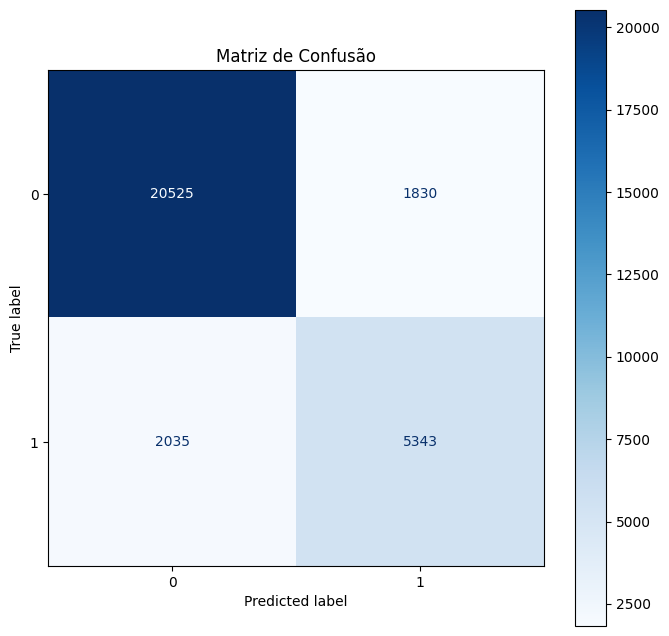

In [30]:
# Previsões com os melhores modelos
y_pred_xgb = grid_lgb.best_estimator_.predict(X_test_prepared)

# Calculando o RMSE para cada modelo
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
print(classification_report(y_test, y_pred_xgb))

# Calculando a matriz de confusão
cm = confusion_matrix(y_test, y_pred_xgb)

# Visualizando a matriz de confusão
fig, ax = plt.subplots(figsize=(8, 8))  # Ajusta o tamanho da figura
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_lgb.best_estimator_.classes_)
disp.plot(cmap='Blues', ax=ax)  # Escolha de um colormap
ax.set_title('Matriz de Confusão')
plt.show()

Minimizar o numero de maus pagadores serem classificados como bons pagadores

In [31]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
print(accuracy_score(y_test, y_pred_xgb))
print(precision_score(y_test, y_pred_xgb))
print(recall_score(y_test, y_pred_xgb))
print(f1_score(y_test, y_pred_xgb))

0.8700097534725726
0.7448766206608114
0.7241799945784766
0.7343825166655212
